# **Import Libraries and modules**

In [0]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D, BatchNormalization
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 2s 0us/step


(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


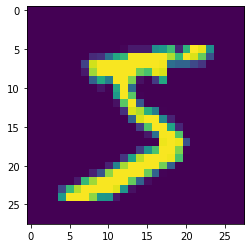

In [0]:
print (X_train.shape)
print (X_test.shape)
print (y_train.shape)
print (y_test.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [0]:
print (X_train.shape)

(60000, 28, 28, 1)


In [0]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [0]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [0]:
from keras.layers import Activation
model = Sequential()

model.add(Convolution2D(64, 3, 3, activation='relu', input_shape=(28,28,1)))
model.add(BatchNormalization())

model.add(Convolution2D(32, 3,3, activation='relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Convolution2D(32,3,3,activation='relu'))
model.add(BatchNormalization())

model.add(Convolution2D(10, 1, activation='relu'))

model.add(Convolution2D(10, 10))

model.add(Dropout(0.1))
model.add(Flatten())
model.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  if sys.path[0] == '':


In [0]:
model.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_58 (Conv2D)           (None, 26, 26, 64)        640       
_________________________________________________________________
batch_normalization_26 (Batc (None, 26, 26, 64)        256       
_________________________________________________________________
conv2d_59 (Conv2D)           (None, 24, 24, 32)        18464     
_________________________________________________________________
batch_normalization_27 (Batc (None, 24, 24, 32)        128       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_60 (Conv2D)           (None, 10, 10, 32)        9248      
_________________________________________________________________
batch_normalization_28 (Batc (None, 10, 10, 32)      

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [0]:
model.fit(X_train, Y_train, batch_size=64, nb_epoch=10, verbose=1, validation_data=(X_test,Y_test))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 11s 179us/step - loss: 0.2194 - acc: 0.9171 - val_loss: 0.0487 - val_acc: 0.9823
Epoch 2/10
60000/60000 [==============================] - 9s 143us/step - loss: 0.1160 - acc: 0.9474 - val_loss: 0.0353 - val_acc: 0.9883
Epoch 3/10
60000/60000 [==============================] - 9s 143us/step - loss: 0.1022 - acc: 0.9522 - val_loss: 0.0361 - val_acc: 0.9880
Epoch 4/10
60000/60000 [==============================] - 9s 143us/step - loss: 0.0940 - acc: 0.9537 - val_loss: 0.0390 - val_acc: 0.9885
Epoch 5/10
60000/60000 [==============================] - 9s 142us/step - loss: 0.0865 - acc: 0.9560 - val_loss: 0.0294 - val_acc: 0.9911
Epoch 6/10
60000/60000 [==============================] - 9s 142us/step - loss: 0.0820 - acc: 0.9573 - val_loss: 0.0327 - val_acc: 0.9906
Epoch 7/10
60000/60000 [==============================] - 8s 141us/step - loss: 0.0805 - acc: 0.9576 - val_loss: 0.0344 -

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [0]:
print(score)

[0.03390166896247838, 0.9919]


In [0]:
y_pred = model.predict(X_test)

In [0]:
print(y_pred[:9])
print(y_test[:9])

[[1.1691764e-15 3.8088544e-14 1.3888500e-11 3.3585598e-10 5.3412300e-17
  1.4073738e-13 1.8595526e-20 1.0000000e+00 5.5426144e-13 4.9876821e-12]
 [1.4741417e-08 5.5227150e-07 9.9999940e-01 1.1522257e-13 6.8008754e-10
  9.2452410e-15 1.2814137e-08 5.3997015e-11 7.6438883e-11 4.9606363e-10]
 [1.6511627e-12 1.0000000e+00 8.2442678e-11 9.9485260e-11 2.0671388e-08
  1.9426754e-08 2.3376331e-10 5.9914527e-09 1.3734958e-09 3.1165018e-11]
 [1.0000000e+00 1.5471924e-14 2.4638080e-12 1.2742581e-09 7.5033024e-14
  9.7798913e-12 1.6523497e-09 5.5032014e-11 2.0735252e-11 3.5592624e-09]
 [1.8635614e-16 9.2416647e-12 2.1698939e-13 1.9184745e-13 1.0000000e+00
  9.8291338e-15 2.7256035e-14 1.1271871e-13 1.7727765e-13 8.3812268e-10]
 [6.9761991e-12 9.9999976e-01 9.4142777e-11 1.5964964e-11 2.1243719e-07
  2.0001467e-10 2.8317745e-10 3.2075086e-08 3.6802170e-09 3.4989480e-11]
 [6.5757132e-18 7.7850898e-10 5.2721633e-12 1.1870442e-12 9.9999988e-01
  1.6237068e-09 9.5196786e-14 2.7006541e-11 1.5149776e-07 

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

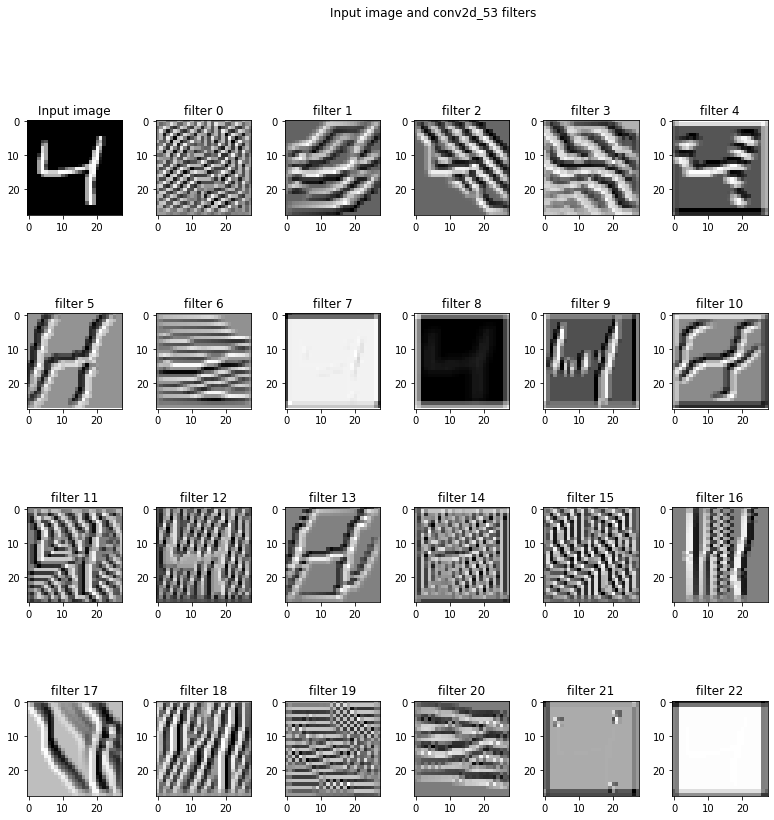

In [0]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_53'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()